In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.animation as anim 
from scipy import integrate
from tqdm import tqdm
%matplotlib ipympl

In [2]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        self.K = 100. #duereza
        self.m = m
        self.radius = radius
        self.Id = Id
        self.p = self.m*self.v
        self.f = self.m*self.a
        
        # energia kinetica y Potencial
        self.Ket = 0.5*self.m*np.dot(self.v,self.v)
        self.VEk = np.zeros(len(t)) #energia kinetica
        self.Pot = 0
        self.POT = np.zeros(len(t))
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
        
        

    #Cambia el objeto - su posicion, velocidad y aceleracion
    def Evolution(self,i):
        
        # Guarda la info de la posicion y velocidad
        
        self.SetPosition(i)
        self.SetVelocity(i)
        self.SetPotencial(i)
        # Hace la evolucion
        self.a = self.f/self.m
        
        #si invierte el orden de las siguientes dos definiciones NO se concervara la energía
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        self.Ket = 0.5*self.m*np.dot(self.v,self.v)
        
        
    def CheckLimits(self):
        for i in range(2):
            if self.r[i] + self.radius > 40 and self.v[i] > 0.:
                self.v[i] = -self.v[i]*0.9
            elif self.r[i] - self.radius < -40 and self.v[i] < 0.:
                self.v[i] = -self.v[i]*0.9
    
    
    # Calcula la fuerza para cambiar la aceleracion, entra como parametro la otra particula
    def CalculateForce(self):
        
        self.f = np.array([0.,-self.m*9.81])
        
    # Setter, realmente solo guardan el historial
    # i es el indice del momento, al ser el n-esimo momento de cambio en el intervalo de tiempo con divisiones dt
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        self.VEk[i] = self.Ket
        
    def SetPotencial(self,i):
        self.POT[i] = self.Pot
        
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale] # Escoge en intervalos de tamaño scale
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.POT[::scale]

# Crea dos objetos de particulas con valores arbitrarios
def GetParticles(N,t):
    """
    Particles = []
    for i in range(N):
        r0 = np.array([np.random.uniform(-39.,39.),np.random.uniform(-39.,39.)])
        v0 = np.array([np.random.uniform(-5.,5.),np.random.uniform(-5.,5.)])
        a0 = np.array([0.,0.])
        
        p0 = Particle(r0,v0,a0,t,Id=i)
        Particles.append(p0)
    """
    
    r0 = np.array([-15.,-10.])
    v0 = np.array([2.,0.])
    a0 = np.array([0.,0.])

    
    p0 = Particle(r0,v0,a0,t,m=1,radius=2,Id=0)
    Particles = [p0]
    
    return Particles


dt = 0.001
tmax = 30
t = np.arange(0,tmax,dt)
N = 10
Particles = GetParticles(N,t)

def RunSimulation(t,Particles):
    # Por cada intervalo de tiempo
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        # Evolucionar cada particula ya habiendo cambiado sus parametros por las interacciones calculadas
        for i in range(len(Particles)):
            Particles[i].CalculateForce()
            Particles[i].CheckLimits()
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            
            
    return Particles


Particles = RunSimulation(t,Particles)

Running simulation: 100%|██████████| 30000/30000 [00:01<00:00, 29501.18 Steps/s]


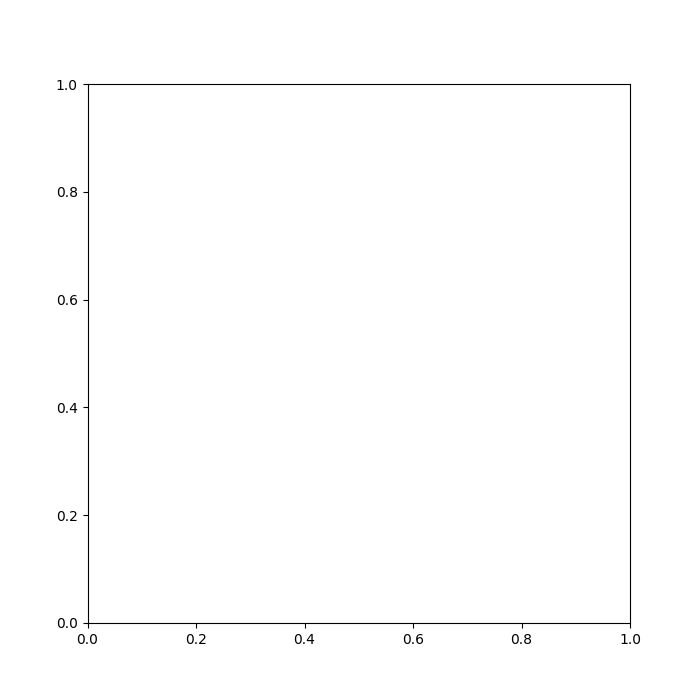

In [3]:
scale = 100
t1 = t[::scale]

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111)

def init():
    ax.clear()
    ax.set_xlim(-40,40)
    ax.set_ylim(-40,40)
    
def Update(i):
    
    init()
    ax.set_title(r't %.3f' %(t1[i]))
  
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5)
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

#### B) 
El tiempo para que deje de rebotar excede el de la simulación, sin embargo, aproximadamente 40 segundos

#### C)

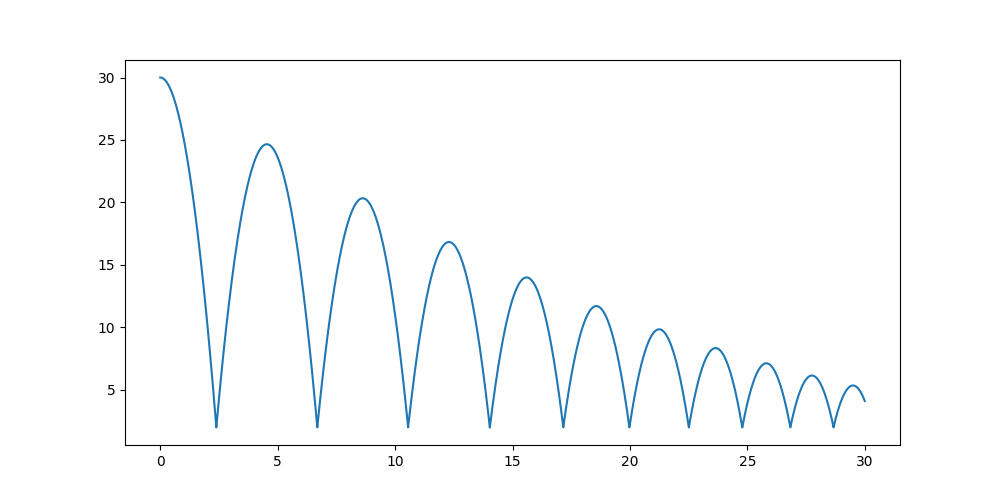

In [16]:
pos = Particles[0].GetPosition()[:,1]
fig,ax2 = plt.subplots(1,1,figsize = (10,5))
pos = pos+40
ax2.plot(t,pos)

Encontramos los maximos tomando -40 como el suelo

In [17]:
n = 0
maximos = np.zeros(2)
for i in range(1,len(pos)):
    if pos[i-1] < pos[i] and pos[i+1] < pos[i]:
        maximos[n] = pos[i]
        n+=1
    if n==2:
        break
maximos

array([24.65879835, 20.3352394 ])

Calculamos el coeficiente de animación

In [18]:
e = np.sqrt(np.abs(maximos[1]/maximos[0]))
e

0.9081104854580966